In [2]:
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('cases_deaths_county_data.csv')
data = data[data['County Name'] != "Statewide Unallocated"]
data

,Unnamed: 0,countyFIPS,County Name,State,StateFIPS,"2020-01-22,cases","2020-01-23,cases","2020-01-24,cases","2020-01-25,cases","2020-01-26,cases",...,"2023-01-08,deaths","2023-01-09,deaths","2023-01-10,deaths","2023-01-11,deaths","2023-01-12,deaths","2023-01-13,deaths","2023-01-14,deaths","2023-01-15,deaths","2023-01-16,deaths",population
1,1,1001,Autauga County,AL,1,0,0,0,0,0,...,230,230,230,230,230,230,230,230,230,55869
2,2,1003,Baldwin County,AL,1,0,0,0,0,0,...,719,719,719,719,721,721,721,721,721,223234
3,3,1005,Barbour County,AL,1,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,24686
4,4,1007,Bibb County,AL,1,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,22394
5,5,1009,Blount County,AL,1,0,0,0,0,0,...,260,260,260,260,261,261,261,261,261,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3188,56037,Sweetwater County,WY,56,0,0,0,0,0,...,136,136,136,136,136,136,136,136,136,42343
3189,3189,56039,Teton County,WY,56,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,23464
3190,3190,56041,Uinta County,WY,56,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,20226
3191,3191,56043,Washakie County,WY,56,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,7805


In [4]:
delete_list = []
for i in range(5, len(data.keys()) - 1):
    if int(data.keys()[i][:4]) != 2022:
        delete_list.append(i)
    elif int(data.keys()[i][5:7]) < 6:
        delete_list.append(i)

new_data = data.drop(data.columns[delete_list],axis = 1)
new_data
# print(new_data.keys()[5:len(new_data.keys()) - 6])

,Unnamed: 0,countyFIPS,County Name,State,StateFIPS,"2022-06-01,cases","2022-06-02,cases","2022-06-03,cases","2022-06-04,cases","2022-06-05,cases",...,"2022-12-23,deaths","2022-12-24,deaths","2022-12-25,deaths","2022-12-26,deaths","2022-12-27,deaths","2022-12-28,deaths","2022-12-29,deaths","2022-12-30,deaths","2022-12-31,deaths",population
1,1,1001,Autauga County,AL,1,15969,15978,15978,15978,15978,...,230,230,230,230,230,230,230,230,230,55869
2,2,1003,Baldwin County,AL,1,56580,56648,56648,56648,56648,...,719,719,719,719,719,719,719,719,719,223234
3,3,1005,Barbour County,AL,1,5710,5714,5714,5714,5714,...,103,103,103,103,103,103,103,103,103,24686
4,4,1007,Bibb County,AL,1,6508,6512,6512,6512,6512,...,108,108,108,108,108,108,108,108,108,22394
5,5,1009,Blount County,AL,1,15077,15084,15084,15084,15084,...,260,260,260,260,260,260,260,260,260,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3188,56037,Sweetwater County,WY,56,11178,11178,11178,11178,11178,...,136,136,136,136,136,136,136,136,136,42343
3189,3189,56039,Teton County,WY,56,10229,10229,10229,10229,10229,...,16,16,16,16,16,16,16,16,16,23464
3190,3190,56041,Uinta County,WY,56,5681,5681,5681,5681,5681,...,43,43,43,43,43,43,43,43,43,20226
3191,3191,56043,Washakie County,WY,56,2369,2369,2369,2369,2369,...,47,47,47,47,47,47,47,47,47,7805


In [5]:
#data sets of all 4 states
NY_data = new_data[new_data.State == "NY"]
NC_data = new_data[new_data.State == "NC"]
TX_data = new_data[new_data.State == "TX"]
HI_data = new_data[new_data.State == "HI"]


NY_data

,Unnamed: 0,countyFIPS,County Name,State,StateFIPS,"2022-06-01,cases","2022-06-02,cases","2022-06-03,cases","2022-06-04,cases","2022-06-05,cases",...,"2022-12-23,deaths","2022-12-24,deaths","2022-12-25,deaths","2022-12-26,deaths","2022-12-27,deaths","2022-12-28,deaths","2022-12-29,deaths","2022-12-30,deaths","2022-12-31,deaths",population
1861,1861,36001,Albany County,NY,36,66065,66182,66182,66182,66405,...,591,591,591,591,591,591,591,593,593,305506
1862,1862,36003,Allegany County,NY,36,9499,9506,9506,9506,9518,...,164,164,164,164,164,164,164,164,164,46091
1863,1863,36005,Bronx County,NY,36,413505,414064,414064,414064,415211,...,8285,8285,8285,8285,8285,8285,8285,8329,8329,1418207
1864,1864,36007,Broome County,NY,36,50431,50465,50465,50465,50540,...,581,581,581,581,581,581,581,584,584,190488
1865,1865,36009,Cattaraugus County,NY,36,16614,16631,16631,16631,16668,...,243,243,243,243,243,243,243,244,244,76117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,1918,36115,Washington County,NY,36,13370,13389,13389,13389,13420,...,133,133,133,133,133,133,133,136,136,61204
1919,1919,36117,Wayne County,NY,36,18891,18906,18906,18906,18930,...,201,201,201,201,201,201,201,201,201,89918
1920,1920,36119,Westchester County,NY,36,274175,274640,274640,274640,275556,...,2912,2912,2912,2912,2912,2912,2912,2929,2929,967506
1921,1921,36121,Wyoming County,NY,36,8928,8933,8933,8933,8943,...,90,90,90,90,90,90,90,90,90,39859


In [6]:
NY_daily_cases_deaths = NY_data.drop(NY_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
cases_indexes = []
deaths_indexes = []
for i in range(len(NY_daily_cases_deaths.keys())):
    if NY_daily_cases_deaths.keys()[i][-5:] == 'cases':
        cases_indexes.append(i)
    else:
        deaths_indexes.append(i)

NY_cases = NY_daily_cases_deaths.drop(NY_daily_cases_deaths.columns[deaths_indexes],axis=1).sum()
NY_deaths = NY_daily_cases_deaths.drop(NY_daily_cases_deaths.columns[cases_indexes],axis=1).sum()


In [7]:
NY_weekly_cases_data = []
NY_weekly_deaths_data = []
holder = []
for i in range(len(NY_cases.keys())):
    if((i + 1) % 7 != 0):
        holder.append(NY_cases[NY_cases.keys()[i]])
    else:
        holder.append(NY_cases[NY_cases.keys()[i]])
        NY_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    NY_weekly_cases_data.append(holder)
    holder = []

for i in range(len(NY_deaths.keys())):
    if((i + 1) % 7 != 0):
        holder.append(NY_deaths[NY_deaths.keys()[i]])
    else:
        holder.append(NY_deaths[NY_deaths.keys()[i]])
        NY_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    NY_weekly_deaths_data.append(holder)
    holder = []

In [8]:
NY_weekly_cases_means = []
NY_weekly_cases_medians = []
NY_weekly_cases_modes = []
for i in NY_weekly_cases_data:
    NY_weekly_cases_means.append(np.mean(i))
    NY_weekly_cases_medians.append(np.median(i))
    NY_weekly_cases_modes.append(mode(i))

NY_weekly_deaths_means = []
NY_weekly_deaths_medians = []
NY_weekly_deaths_modes = []
for i in NY_weekly_deaths_data:
    NY_weekly_deaths_means.append(np.mean(i))
    NY_weekly_deaths_medians.append(np.median(i))
    NY_weekly_deaths_modes.append(mode(i))

In [9]:
#generate datasets for NC
NC_daily_cases_deaths = NC_data.drop(NC_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
NC_cases = NC_daily_cases_deaths.drop(NC_daily_cases_deaths.columns[deaths_indexes],axis=1).sum()
NC_deaths = NC_daily_cases_deaths.drop(NC_daily_cases_deaths.columns[cases_indexes],axis=1).sum()


NC_weekly_cases_data = []
NC_weekly_deaths_data = []
holder = []
for i in range(len(NC_cases.keys())):
    if((i + 1) % 7 != 0):
        holder.append(NC_cases[NC_cases.keys()[i]])
    else:
        holder.append(NC_cases[NC_cases.keys()[i]])
        NC_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    NC_weekly_cases_data.append(holder)
    holder = []

for i in range(len(NC_deaths.keys())):
    if((i + 1) % 7 != 0):
        holder.append(NC_deaths[NC_deaths.keys()[i]])
    else:
        holder.append(NC_deaths[NC_deaths.keys()[i]])
        NC_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    NC_weekly_deaths_data.append(holder)
    holder = []


NC_weekly_cases_means = []
NC_weekly_cases_medians = []
NC_weekly_cases_modes = []
for i in NC_weekly_cases_data:
    NC_weekly_cases_means.append(np.mean(i))
    NC_weekly_cases_medians.append(np.median(i))
    NC_weekly_cases_modes.append(mode(i))

NC_weekly_deaths_means = []
NC_weekly_deaths_medians = []
NC_weekly_deaths_modes = []
for i in NC_weekly_deaths_data:
    NC_weekly_deaths_means.append(np.mean(i))
    NC_weekly_deaths_medians.append(np.median(i))
    NC_weekly_deaths_modes.append(mode(i))

In [10]:
#generate data for SC
HI_daily_cases_deaths = HI_data.drop(HI_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
HI_cases = HI_daily_cases_deaths.drop(HI_daily_cases_deaths.columns[deaths_indexes],axis=1).sum()
HI_deaths = HI_daily_cases_deaths.drop(HI_daily_cases_deaths.columns[cases_indexes],axis=1).sum()


HI_weekly_cases_data = []
HI_weekly_deaths_data = []
holder = []
for i in range(len(HI_cases.keys())):
    if((i + 1) % 7 != 0):
        holder.append(HI_cases[HI_cases.keys()[i]])
    else:
        holder.append(HI_cases[HI_cases.keys()[i]])
        HI_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    HI_weekly_cases_data.append(holder)
    holder = []

for i in range(len(HI_deaths.keys())):
    if((i + 1) % 7 != 0):
        holder.append(HI_deaths[HI_deaths.keys()[i]])
    else:
        holder.append(HI_deaths[HI_deaths.keys()[i]])
        HI_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    HI_weekly_deaths_data.append(holder)
    holder = []


HI_weekly_cases_means = []
HI_weekly_cases_medians = []
HI_weekly_cases_modes = []
for i in HI_weekly_cases_data:
    HI_weekly_cases_means.append(np.mean(i))
    HI_weekly_cases_medians.append(np.median(i))
    HI_weekly_cases_modes.append(mode(i))

HI_weekly_deaths_means = []
HI_weekly_deaths_medians = []
HI_weekly_deaths_modes = []
for i in HI_weekly_deaths_data:
    HI_weekly_deaths_means.append(np.mean(i))
    HI_weekly_deaths_medians.append(np.median(i))
    HI_weekly_deaths_modes.append(mode(i))

In [11]:
#generate data for TX
TX_daily_cases_deaths = TX_data.drop(TX_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
TX_cases = TX_daily_cases_deaths.drop(TX_daily_cases_deaths.columns[deaths_indexes],axis=1).sum()
TX_deaths = TX_daily_cases_deaths.drop(TX_daily_cases_deaths.columns[cases_indexes],axis=1).sum()


TX_weekly_cases_data = []
TX_weekly_deaths_data = []
holder = []
for i in range(len(TX_cases.keys())):
    if((i + 1) % 7 != 0):
        holder.append(TX_cases[TX_cases.keys()[i]])
    else:
        holder.append(TX_cases[TX_cases.keys()[i]])
        TX_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    TX_weekly_cases_data.append(holder)
    holder = []

for i in range(len(TX_deaths.keys())):
    if((i + 1) % 7 != 0):
        holder.append(TX_deaths[TX_deaths.keys()[i]])
    else:
        holder.append(TX_deaths[TX_deaths.keys()[i]])
        TX_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    TX_weekly_deaths_data.append(holder)
    holder = []


TX_weekly_cases_means = []
TX_weekly_cases_medians = []
TX_weekly_cases_modes = []
for i in TX_weekly_cases_data:
    TX_weekly_cases_means.append(np.mean(i))
    TX_weekly_cases_medians.append(np.median(i))
    TX_weekly_cases_modes.append(mode(i))

TX_weekly_deaths_means = []
TX_weekly_deaths_medians = []
TX_weekly_deaths_modes = []
for i in TX_weekly_deaths_data:
    TX_weekly_deaths_means.append(np.mean(i))
    TX_weekly_deaths_medians.append(np.median(i))
    TX_weekly_deaths_modes.append(mode(i))

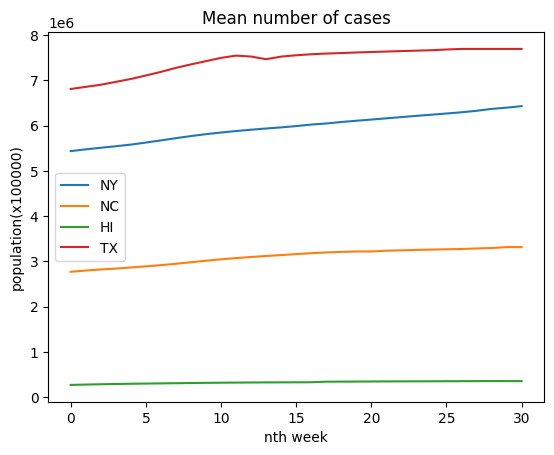

In [66]:
plt.plot(NY_weekly_cases_means, label='NY')
plt.plot(NC_weekly_cases_means, label='NC')
plt.plot(HI_weekly_cases_means, label='HI')
plt.plot(TX_weekly_cases_means, label='TX')
plt.title("Mean number of cases")
plt.legend()
plt.xlabel("nth week")
plt.ylabel("population(x100000)")
plt.show()

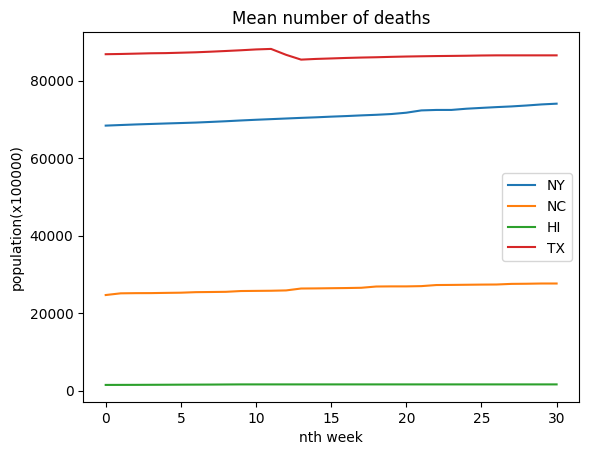

In [67]:
plt.plot(NY_weekly_deaths_means, label='NY')
plt.plot(NC_weekly_deaths_means, label='NC')
plt.plot(HI_weekly_deaths_means, label='HI')
plt.plot(TX_weekly_deaths_means, label='TX')
plt.title("Mean number of deaths")
plt.legend()
plt.xlabel("nth week")
plt.ylabel("population(x100000)")
plt.show()

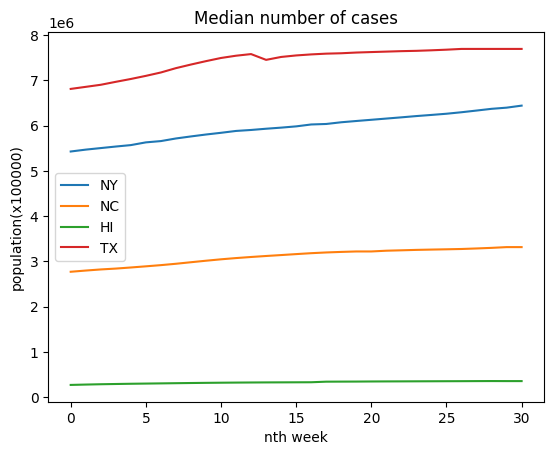

In [68]:
plt.plot(NY_weekly_cases_medians, label='NY')
plt.plot(NC_weekly_cases_medians, label='NC')
plt.plot(HI_weekly_cases_medians, label='HI')
plt.plot(TX_weekly_cases_medians, label='TX')
plt.title("Median number of cases")
plt.legend()
plt.xlabel("nth week")
plt.ylabel("population(x100000)")
plt.show()

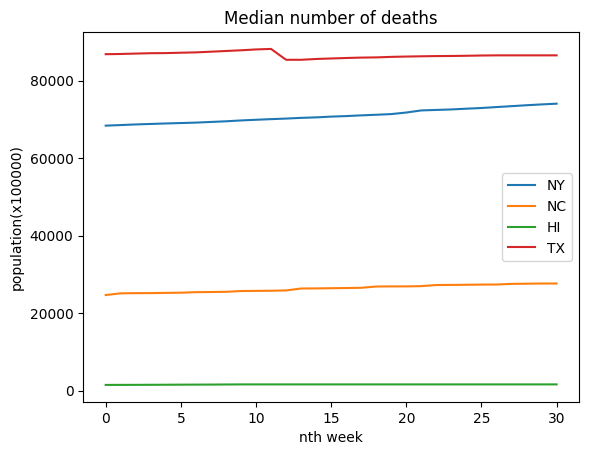

In [69]:
plt.plot(NY_weekly_deaths_medians, label='NY')
plt.plot(NC_weekly_deaths_medians, label='NC')
plt.plot(HI_weekly_deaths_medians, label='HI')
plt.plot(TX_weekly_deaths_medians, label='TX')
plt.title("Median number of deaths")
plt.legend()
plt.xlabel("nth week")
plt.ylabel("population")
plt.show()

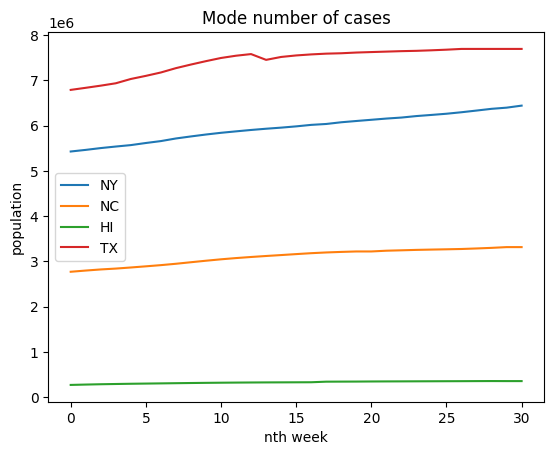

In [70]:
plt.plot(NY_weekly_cases_modes, label='NY')
plt.plot(NC_weekly_cases_modes, label='NC')
plt.plot(HI_weekly_cases_modes, label='HI')
plt.plot(TX_weekly_cases_modes, label='TX')
plt.title("Mode number of cases")
plt.legend()
plt.xlabel("nth week")
plt.ylabel("population")
plt.show()

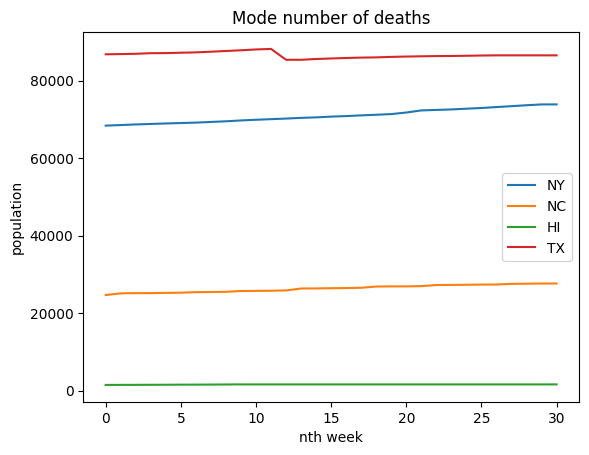

In [71]:
plt.plot(NY_weekly_deaths_modes, label='NY')
plt.plot(NC_weekly_deaths_modes, label='NC')
plt.plot(HI_weekly_deaths_modes, label='HI')
plt.plot(TX_weekly_deaths_modes, label='TX')
plt.title("Mode number of deaths")
plt.legend()
plt.xlabel("nth week")
plt.ylabel("population")
plt.show()

Text(0.5, 1.0, 'Texas cases')

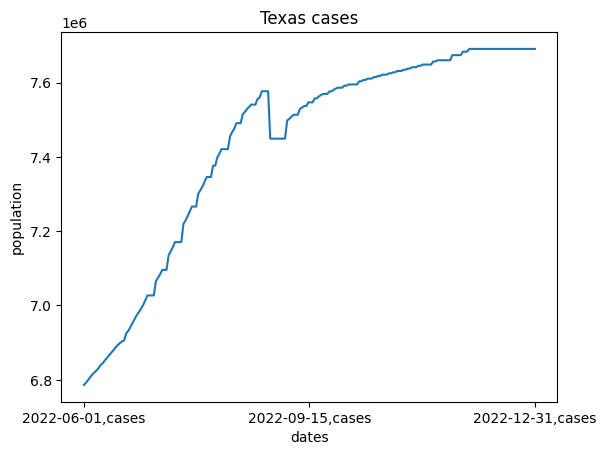

In [90]:
#Texas data inconsistency
plt.plot(TX_cases)
plt.xticks([0,(len(TX_cases.keys()) - 1) / 2, len(TX_cases.keys()) - 1])
plt.xlabel("dates")
plt.ylabel("population")
plt.title("Texas cases")

Text(0.5, 1.0, 'Texas deaths')

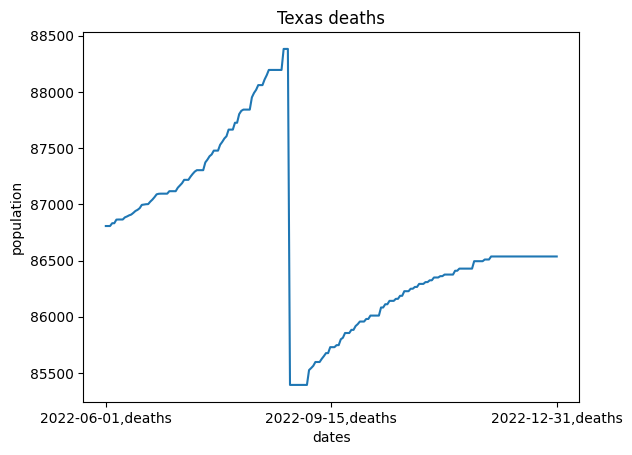

In [91]:
plt.plot(TX_deaths)
plt.xticks([0,(len(TX_deaths.keys()) - 1) / 2, len(TX_deaths.keys()) - 1])
plt.xlabel("dates")
plt.ylabel("population")
plt.title("Texas deaths")

These graphs all follow a similar trend where numbers go up until week 10-15 before rates slow down. However, New York is slighlty different as its values continue to consistently rise by the time other states have slowed down. This is most likely due to the high population density which makes it easier for covid to spread through the population. Even though Texas has a larger overall population, the population density is lower because the population is spread out over a larger area which makes it harder for covid to be spread throughout the population. This explains why the rate of deaths and cases in Texas slow down like North Carolina and Hawaii instead of consistently rising like New York.

The dip in the Texas graphs is due to inconsistent data where the numbers suddenly drop and stay the same for an about a week.

In [20]:
texas_counties = 48000
harris_county = 201
dallas_county = 113
tarrant_county = 439

harris_data = TX_data[TX_data.countyFIPS == texas_counties + harris_county]
dallas_data = TX_data[TX_data.countyFIPS == texas_counties + dallas_county]
tarrant_data = TX_data[TX_data.countyFIPS == texas_counties + tarrant_county]


In [21]:
harris_daily_cases_deaths = harris_data.drop(harris_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
harris_cases = harris_daily_cases_deaths.drop(harris_daily_cases_deaths.columns[deaths_indexes],axis=1).sum()
harris_deaths = harris_daily_cases_deaths.drop(harris_daily_cases_deaths.columns[cases_indexes],axis=1).sum()

dallas_daily_cases_deaths = dallas_data.drop(dallas_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
dallas_cases = dallas_daily_cases_deaths.drop(dallas_daily_cases_deaths.columns[deaths_indexes],axis=1).sum()
dallas_deaths = dallas_daily_cases_deaths.drop(dallas_daily_cases_deaths.columns[cases_indexes],axis=1).sum()

tarrant_daily_cases_deaths = tarrant_data.drop(tarrant_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
tarrant_cases = tarrant_daily_cases_deaths.drop(tarrant_daily_cases_deaths.columns[deaths_indexes],axis=1).sum()
tarrant_deaths = tarrant_daily_cases_deaths.drop(tarrant_daily_cases_deaths.columns[cases_indexes],axis=1).sum()

I was not sure what the instructions meant by plotting weekly trends for the county data so I found the weekly mean, median, and mode for all the counties. This process is the same what I did for each state.

In [27]:
#generate data for harris county

harris_weekly_cases_data = []
harris_weekly_deaths_data = []
holder = []
for i in range(len(harris_cases.keys())):
    if((i + 1) % 7 != 0):
        holder.append(harris_cases[harris_cases.keys()[i]])
    else:
        holder.append(harris_cases[harris_cases.keys()[i]])
        harris_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    harris_weekly_cases_data.append(holder)
    holder = []

for i in range(len(harris_deaths.keys())):
    if((i + 1) % 7 != 0):
        holder.append(harris_deaths[harris_deaths.keys()[i]])
    else:
        holder.append(harris_deaths[harris_deaths.keys()[i]])
        harris_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    harris_weekly_deaths_data.append(holder)
    holder = []


harris_weekly_cases_means = []
harris_weekly_cases_medians = []
harris_weekly_cases_modes = []
for i in harris_weekly_cases_data:
    harris_weekly_cases_means.append(np.mean(i))
    harris_weekly_cases_medians.append(np.median(i))
    harris_weekly_cases_modes.append(mode(i))

harris_weekly_deaths_means = []
harris_weekly_deaths_medians = []
harris_weekly_deaths_modes = []
for i in harris_weekly_deaths_data:
    harris_weekly_deaths_means.append(np.mean(i))
    harris_weekly_deaths_medians.append(np.median(i))
    harris_weekly_deaths_modes.append(mode(i))

In [28]:
#generate datasets for dallas
dallas_weekly_cases_data = []
dallas_weekly_deaths_data = []
holder = []
for i in range(len(dallas_cases.keys())):
    if((i + 1) % 7 != 0):
        holder.append(dallas_cases[dallas_cases.keys()[i]])
    else:
        holder.append(dallas_cases[dallas_cases.keys()[i]])
        dallas_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    dallas_weekly_cases_data.append(holder)
    holder = []

for i in range(len(dallas_deaths.keys())):
    if((i + 1) % 7 != 0):
        holder.append(dallas_deaths[dallas_deaths.keys()[i]])
    else:
        holder.append(dallas_deaths[dallas_deaths.keys()[i]])
        dallas_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    dallas_weekly_deaths_data.append(holder)
    holder = []


dallas_weekly_cases_means = []
dallas_weekly_cases_medians = []
dallas_weekly_cases_modes = []
for i in dallas_weekly_cases_data:
    dallas_weekly_cases_means.append(np.mean(i))
    dallas_weekly_cases_medians.append(np.median(i))
    dallas_weekly_cases_modes.append(mode(i))

dallas_weekly_deaths_means = []
dallas_weekly_deaths_medians = []
dallas_weekly_deaths_modes = []
for i in dallas_weekly_deaths_data:
    dallas_weekly_deaths_means.append(np.mean(i))
    dallas_weekly_deaths_medians.append(np.median(i))
    dallas_weekly_deaths_modes.append(mode(i))

In [29]:
#generate datasets for tarrant
tarrant_weekly_cases_data = []
tarrant_weekly_deaths_data = []
holder = []
for i in range(len(tarrant_cases.keys())):
    if((i + 1) % 7 != 0):
        holder.append(tarrant_cases[tarrant_cases.keys()[i]])
    else:
        holder.append(tarrant_cases[tarrant_cases.keys()[i]])
        tarrant_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    tarrant_weekly_cases_data.append(holder)
    holder = []

for i in range(len(tarrant_deaths.keys())):
    if((i + 1) % 7 != 0):
        holder.append(tarrant_deaths[tarrant_deaths.keys()[i]])
    else:
        holder.append(tarrant_deaths[tarrant_deaths.keys()[i]])
        tarrant_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    tarrant_weekly_deaths_data.append(holder)
    holder = []


tarrant_weekly_cases_means = []
tarrant_weekly_cases_medians = []
tarrant_weekly_cases_modes = []
for i in tarrant_weekly_cases_data:
    tarrant_weekly_cases_means.append(np.mean(i))
    tarrant_weekly_cases_medians.append(np.median(i))
    tarrant_weekly_cases_modes.append(mode(i))

tarrant_weekly_deaths_means = []
tarrant_weekly_deaths_medians = []
tarrant_weekly_deaths_modes = []
for i in tarrant_weekly_deaths_data:
    tarrant_weekly_deaths_means.append(np.mean(i))
    tarrant_weekly_deaths_medians.append(np.median(i))
    tarrant_weekly_deaths_modes.append(mode(i))

First, I will show the raw data for cases and deaths for all three counties.

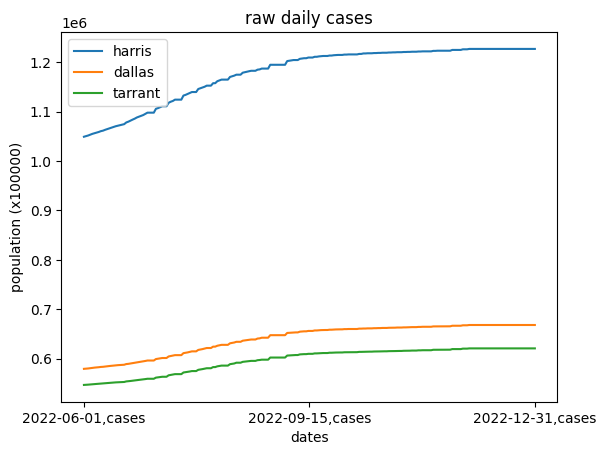

In [92]:
plt.plot(harris_cases, label='harris')
plt.plot(dallas_cases, label='dallas')
plt.plot(tarrant_cases, label='tarrant')
plt.title('raw daily cases')
plt.xticks([0,(len(harris_cases.keys()) - 1) / 2, len(harris_cases.keys()) - 1])
plt.xlabel("dates")
plt.ylabel("population (x100000)")
plt.legend()

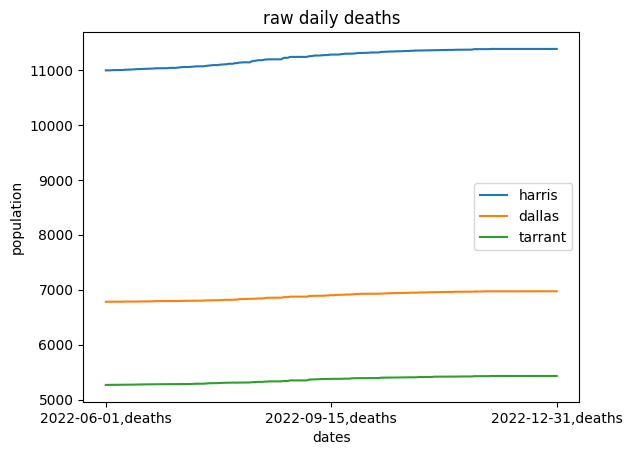

In [93]:
plt.plot(harris_deaths, label='harris')
plt.plot(dallas_deaths, label='dallas')
plt.plot(tarrant_deaths, label='tarrant')
plt.title('raw daily deaths')
plt.xticks([0,(len(harris_cases.keys()) - 1) / 2, len(harris_cases.keys()) - 1])
plt.xlabel("dates")
plt.ylabel("population")
plt.legend()

The raw data for cases and deaths for all three of the counties follow the same trends. The rates of the cases and deaths both start to slow down after the months August and September. Number kept rising until then because of the new omicron variant of covid that the vaccine did not counter. However, new vaccines came out that did help with omicron so the numbers kept slowing down until the end of 2022.

Now, I show the log normalized values for the raw data. They graph looks exactly like the raw data without the log normalizing step except that the values have much less variation.

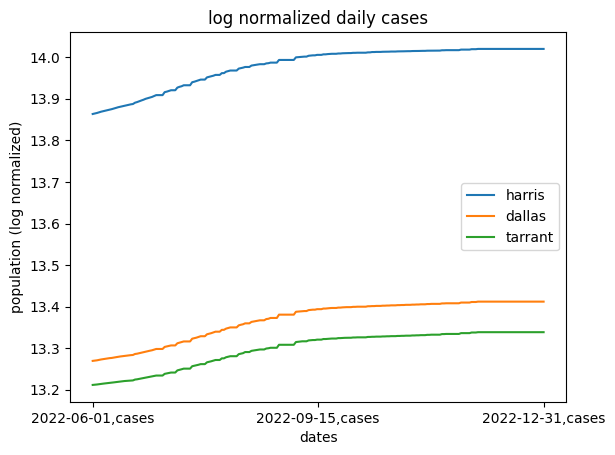

In [94]:
log_harris_cases = np.log(harris_cases)
log_dallas_cases = np.log(dallas_cases)
log_tarrant_cases = np.log(tarrant_cases)

plt.plot(log_harris_cases, label='harris')
plt.plot(log_dallas_cases, label='dallas')
plt.plot(log_tarrant_cases, label='tarrant')
plt.title('log normalized daily cases')
plt.xticks([0,(len(log_harris_cases.keys()) - 1) / 2, len(log_harris_cases.keys()) - 1])
plt.xlabel("dates")
plt.ylabel("population (log normalized)")
plt.legend()

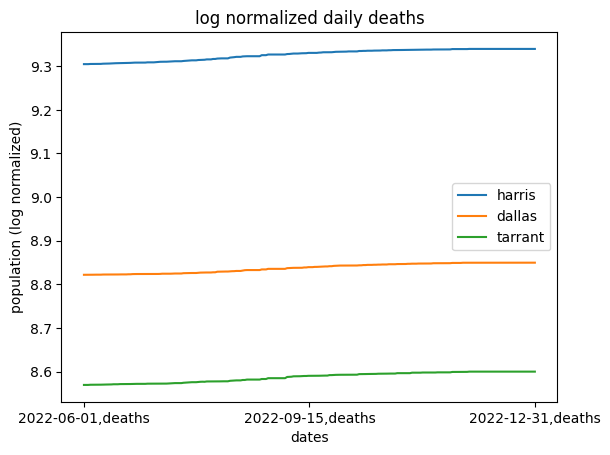

In [95]:
log_harris_deaths = np.log(harris_deaths)
log_dallas_deaths = np.log(dallas_deaths)
log_tarrant_deaths = np.log(tarrant_deaths)

plt.plot(log_harris_deaths, label='harris')
plt.plot(log_dallas_deaths, label='dallas')
plt.plot(log_tarrant_deaths, label='tarrant')
plt.title('log normalized daily deaths')
plt.xticks([0,(len(log_harris_cases.keys()) - 1) / 2, len(log_harris_cases.keys()) - 1])
plt.xlabel("dates")
plt.ylabel("population (log normalized)")
plt.legend()

Now, I display the weekly trends(mean, meadian, mode) of the county data.

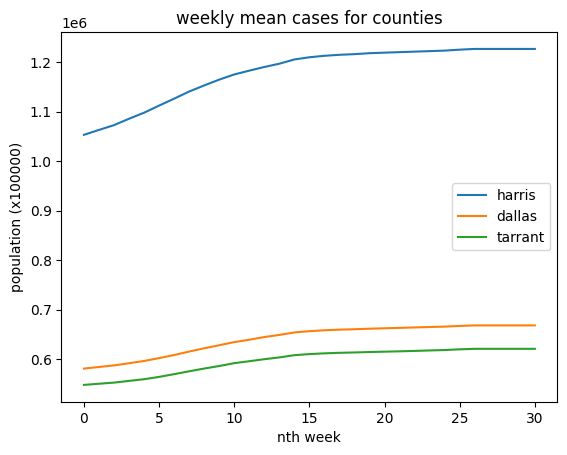

In [97]:
plt.plot(harris_weekly_cases_means, label='harris')
plt.plot(dallas_weekly_cases_means, label='dallas')
plt.plot(tarrant_weekly_cases_means, label='tarrant')
plt.title('weekly mean cases for counties')
plt.xlabel("nth week")
plt.ylabel("population (x100000)")
plt.legend()

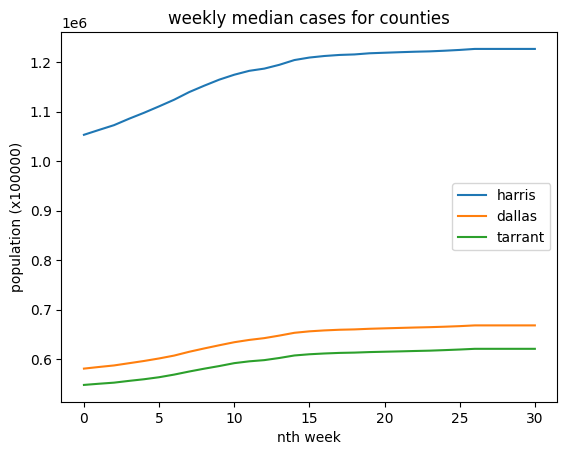

In [98]:
plt.plot(harris_weekly_cases_medians, label='harris')
plt.plot(dallas_weekly_cases_medians, label='dallas')
plt.plot(tarrant_weekly_cases_medians, label='tarrant')
plt.title('weekly median cases for counties')
plt.xlabel("nth week")
plt.ylabel("population (x100000)")
plt.legend()

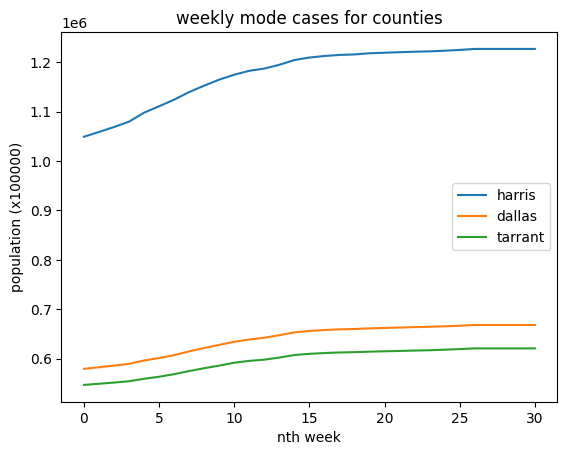

In [99]:
plt.plot(harris_weekly_cases_modes, label='harris')
plt.plot(dallas_weekly_cases_modes, label='dallas')
plt.plot(tarrant_weekly_cases_modes, label='tarrant')
plt.title('weekly mode cases for counties')
plt.xlabel("nth week")
plt.ylabel("population (x100000)")
plt.legend()

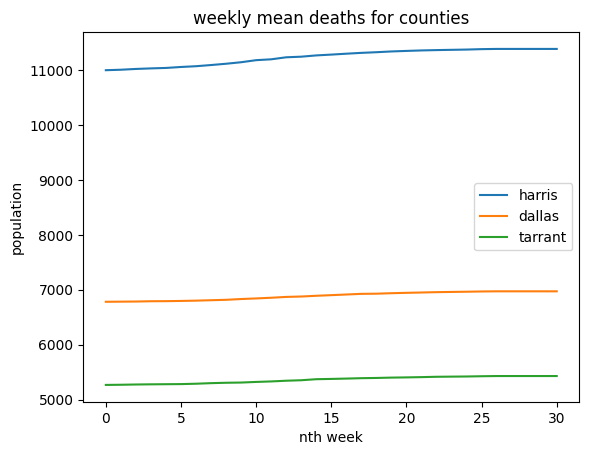

In [100]:
plt.plot(harris_weekly_deaths_means, label='harris')
plt.plot(dallas_weekly_deaths_means, label='dallas')
plt.plot(tarrant_weekly_deaths_means, label='tarrant')
plt.title('weekly mean deaths for counties')
plt.xlabel("nth week")
plt.ylabel("population")
plt.legend()

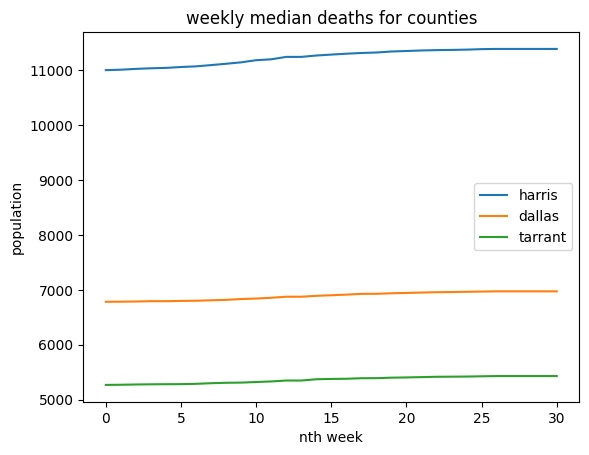

In [102]:
plt.plot(harris_weekly_deaths_medians, label='harris')
plt.plot(dallas_weekly_deaths_medians, label='dallas')
plt.plot(tarrant_weekly_deaths_medians, label='tarrant')
plt.title('weekly median deaths for counties')
plt.xlabel("nth week")
plt.ylabel("population")
plt.legend()

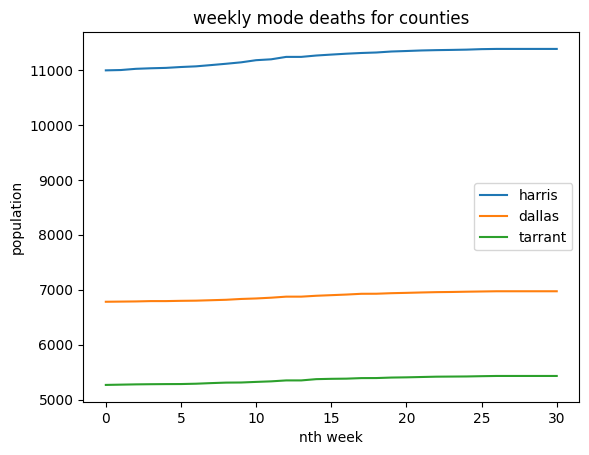

In [103]:
plt.plot(harris_weekly_deaths_modes, label='harris')
plt.plot(dallas_weekly_deaths_modes, label='dallas')
plt.plot(tarrant_weekly_deaths_modes, label='tarrant')
plt.title('weekly mode deaths for counties')
plt.xlabel("nth week")
plt.ylabel("population")
plt.legend()

The weekly trends of the counties are very similar to the weekly trends of the states. The number of cases and deaths for all three counties continue to rise at faster rates up until around the 13th week where the line starts to flatten again. The rise in rate of new covid cases and deaths for the first 13 weeks can be explained by the new omicron variant of covid that started spreading at alarming rates even after covid vaccinations were being given. The omicron was able to ignore the affects of available vaccinations which allowed it to spread for several months. However, vaccinations started coming out for the omicron variant which slowed down the rates again towards the end of the year.